In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ast  # Converts string representation of list into actual list


In [15]:

def plot_cwe_coverage(top_cwe_data, titles):
    top_cwe_data.drop(columns=["Total"], inplace=True)
    
    # Plot CWE occurrences
    fig, ax = plt.subplots(figsize=(12, 6))
    top_cwe_data.plot(kind="bar", ax=ax)
    ax.set_xlabel("CWE ID")
    ax.set_ylabel("Frequency")
    ax.set_title("Top 10 Most Frequent CWEs Across OSS Repositories")
    ax.legend(titles, loc="upper right")
    plt.xticks(rotation=45)
    plt.grid(axis="y")
    plt.tight_layout()
    plt.show()

In [16]:
def analyze_cwe_coverage(csv_files, titles):
    cwe_counts = {}
    
    for csv_file, title in zip(csv_files, titles):
        df = pd.read_csv(csv_file)
        # df["unique_cwes"] = df["unique_cwes"].apply(eval)  # Convert string to list
        df["unique_cwes"] = df["unique_cwes"].apply(ast.literal_eval) 
        
        all_cwes = sum(df["unique_cwes"], [])
        cwe_counts[title] = pd.Series(all_cwes).value_counts()
    
    # Combine CWE counts across repositories
    combined_cwe_counts = pd.concat(cwe_counts, axis=1).fillna(0)
    combined_cwe_counts["Total"] = combined_cwe_counts.sum(axis=1)
    
    # Select top 10 most frequent CWEs
    top_cwes = combined_cwe_counts["Total"].nlargest(10).index
    top_cwe_data = combined_cwe_counts.loc[top_cwes]
    
    print("\nTop 10 Most Frequent CWEs Across Repositories:\n", top_cwe_data)
    
    # Visualization
    plot_cwe_coverage(top_cwe_data, titles)



Top 10 Most Frequent CWEs Across Repositories:
      ArchieveBox  hosts  pwntools  Total
259         99.0   99.0      99.0  297.0
327         99.0   99.0      99.0  297.0
377         99.0   99.0      99.0  297.0
330         99.0   99.0      99.0  297.0
78          99.0   99.0      99.0  297.0
20          99.0   99.0      99.0  297.0
22          99.0   99.0      99.0  297.0
502         99.0   99.0      99.0  297.0
605         99.0   99.0      99.0  297.0
703         99.0   99.0      99.0  297.0


<>:2: SyntaxWarning: invalid escape sequence '\A'
<>:2: SyntaxWarning: invalid escape sequence '\h'
<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\A'
<>:2: SyntaxWarning: invalid escape sequence '\h'
<>:2: SyntaxWarning: invalid escape sequence '\p'
C:\Users\bhanu\AppData\Local\Temp\ipykernel_19404\3703423605.py:2: SyntaxWarning: invalid escape sequence '\A'
  csv_files = ["individual_repository_level_analysis\ArchieveBox_bandit_summary.csv", "individual_repository_level_analysis\hosts_bandit_summary.csv","individual_repository_level_analysis\pwntools_bandit_summary.csv"]
C:\Users\bhanu\AppData\Local\Temp\ipykernel_19404\3703423605.py:2: SyntaxWarning: invalid escape sequence '\h'
  csv_files = ["individual_repository_level_analysis\ArchieveBox_bandit_summary.csv", "individual_repository_level_analysis\hosts_bandit_summary.csv","individual_repository_level_analysis\pwntools_bandit_summary.csv"]
C:\Users\bhanu\AppData\Local\Temp\ipykerne

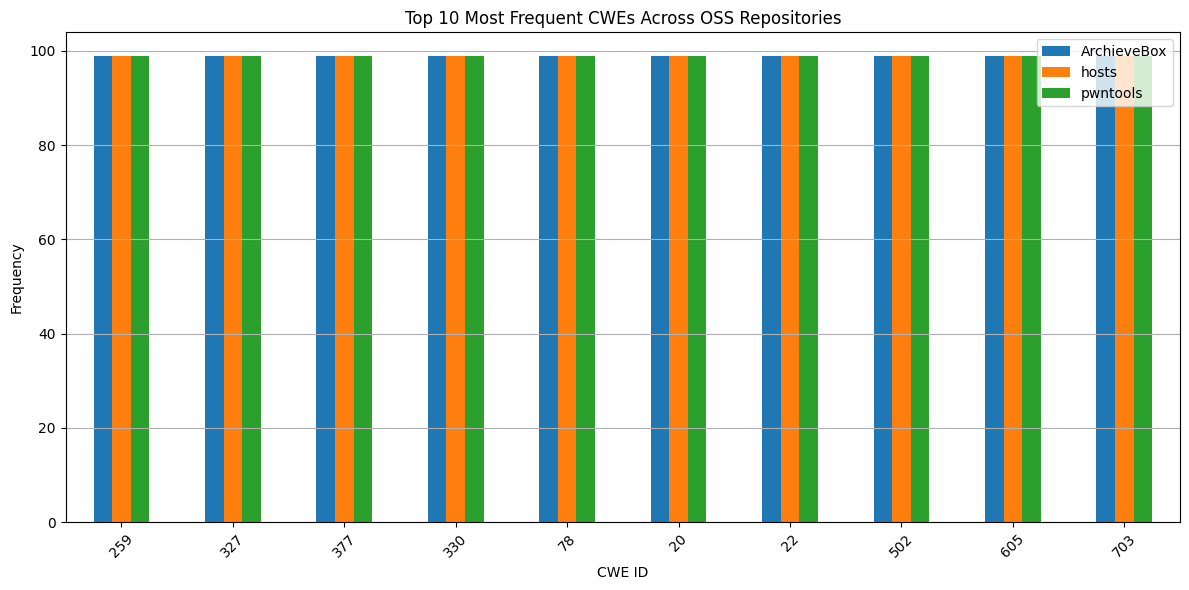

In [17]:
# Example usage
csv_files = ["individual_repository_level_analysis\ArchieveBox_bandit_summary.csv", "individual_repository_level_analysis\hosts_bandit_summary.csv","individual_repository_level_analysis\pwntools_bandit_summary.csv"]
titles = ["ArchieveBox", "hosts", "pwntools"]
analyze_cwe_coverage(csv_files, titles)

In [19]:
import os
import pandas as pd

In [26]:
import os
import pandas as pd

def analyze_cwe_coverage(csv_file, title):
    print(f"\n[DEBUG] Starting CWE analysis for: {title}")
    print(f"[DEBUG] Expected CSV file path: {csv_file}")

    # Check if file exists
    if not os.path.exists(csv_file):
        print(f"[ERROR] File not found: {csv_file}")
        return

    print("[DEBUG] File found. Attempting to read CSV...")

    try:
        df = pd.read_csv(csv_file)
        print("[DEBUG] CSV loaded successfully!")
    except Exception as e:
        print(f"[ERROR] Failed to read CSV: {e}")
        return

    print("[DEBUG] First few rows of the dataset:")
    print(df.head())

    # Ensure 'unique_cwes' column exists
    if "unique_cwes" not in df.columns:
        print(f"[ERROR] Column 'unique_cwes' not found in {csv_file}. Available columns: {df.columns}")
        return

    # Convert 'unique_cwes' column from string to list
    try:
        df["unique_cwes"] = df["unique_cwes"].apply(eval)
        print("[DEBUG] Successfully converted 'unique_cwes' column to list.")
    except Exception as e:
        print(f"[ERROR] Failed to convert 'unique_cwes' column: {e}")
        return

    # Debug: Print a sample of CWE lists
    print("\n[DEBUG] Sample unique_cwes column values (first 5 rows):")
    for i in range(min(5, len(df))):
        print(f"Row {i}: {df.iloc[i]['unique_cwes']}")

    # Flatten the CWE list using `explode()`
    df_exploded = df.explode("unique_cwes")
    all_cwes = df_exploded["unique_cwes"].astype(int)  # Ensure they are integers

    # Debug: Print a sample of extracted CWE IDs before counting
    print("\n[DEBUG] Sample of extracted CWE IDs after explode:")
    print(all_cwes.head(20).to_string(index=False))

    # Count occurrences correctly
    cwe_counts = all_cwes.value_counts()

    # Create a summary DataFrame
    cwe_summary = pd.DataFrame({
        "CWE ID": cwe_counts.index,
        "Occurrences": cwe_counts.values
    }).reset_index(drop=True)

    print("\n[DEBUG] Top 10 most frequent CWEs:")
    print(cwe_summary.head(10).to_string(index=False))

    return cwe_summary

# Example usage
csv_file = "individual_repository_level_analysis/pwntools_bandit_summary.csv"
title = "ArchieveBox"
cwe_results = analyze_cwe_coverage(csv_file, title)



[DEBUG] Starting CWE analysis for: ArchieveBox
[DEBUG] Expected CSV file path: individual_repository_level_analysis/pwntools_bandit_summary.csv
[DEBUG] File found. Attempting to read CSV...
[DEBUG] CSV loaded successfully!
[DEBUG] First few rows of the dataset:
   high_conf  med_conf  low_conf  high_sev  med_sev  low_sev  \
0       2907        39         7        44      138     2771   
1       2911        39         7        44      138     2775   
2       2907        39         7        44      138     2771   
3       2905        39         7        44      138     2769   
4       2907        39         7        44      138     2771   

                                         unique_cwes  total_unique_cwes  \
0  [259, 327, 295, 330, 78, 80, 20, 22, 502, 377,...                 13   
1  [259, 327, 295, 330, 78, 80, 20, 22, 502, 377,...                 13   
2  [259, 327, 295, 330, 78, 80, 20, 22, 502, 377,...                 13   
3  [259, 327, 295, 330, 78, 80, 20, 22, 502, 377,...

In [6]:
df1 = pd.read_csv("individual_repository_level_analysis/ArchieveBox_bandit_summary.csv")
df2 = pd.read_csv("individual_repository_level_analysis/hosts_bandit_summary.csv")
df3 = pd.read_csv("individual_repository_level_analysis/pwntools_bandit_summary.csv")

In [8]:
import pandas as pd
from collections import Counter

# Combine all unique CWE lists from the three dataframes
all_cwes = []
for df in [df1, df2, df3]:
    all_cwes.extend(df["unique_cwes"].explode())  # Flatten the lists

# Count occurrences of each CWE
cwe_counts = Counter(all_cwes)

# Get the top 10 most frequent CWEs
top_10_cwes = cwe_counts.most_common(10)

# Print the results
print("Top 10 Most Frequent CWEs Across Repositories:")
for cwe, count in top_10_cwes:
    print(f"CWE-{cwe}: {count} occurrences")


Top 10 Most Frequent CWEs Across Repositories:
CWE-[259, 327, 377, 330, 78, 79, 400, 80, 20, 22, 502, 89, 732, 605, 703]: 99 occurrences
CWE-[259, 327, 330, 78, 400, 20, 22, 502, 377, 605, 703]: 99 occurrences
CWE-[259, 327, 295, 330, 78, 80, 20, 22, 502, 377, 732, 605, 703]: 99 occurrences
